# Load Libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#  Data Loading

In [4]:
titanic_train = pd.read_csv('train.csv')
titanic_test = pd.read_csv('test.csv')

In [5]:
titanic_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
titanic_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# Data Cleaning

In [7]:
# As we can't predict 70% of the Cabin Column, we are removing the Cabin column
titanic_train.drop(columns=['Cabin'], inplace=True)

In [8]:
titanic_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [9]:
titanic_test.drop(columns=['Cabin'], inplace = True)

In [10]:
titanic_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(4)
memory usage: 32.8+ KB


In [11]:
titanic_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
dtype: int64

In [12]:
titanic_test.isnull().sum()

PassengerId     0
Pclass          0
Name            0
Sex             0
Age            86
SibSp           0
Parch           0
Ticket          0
Fare            1
Embarked        0
dtype: int64

In [13]:
titanic_train['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [14]:
titanic_train['Embarked'].fillna('S', inplace=True)

In [15]:
titanic_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         0
dtype: int64

In [16]:
titanic_test['Fare'].fillna(titanic_test['Fare'].mean(), inplace=True)

In [17]:
titanic_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S
...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,S


In [18]:
titanic_test.isnull().sum()

PassengerId     0
Pclass          0
Name            0
Sex             0
Age            86
SibSp           0
Parch           0
Ticket          0
Fare            0
Embarked        0
dtype: int64

In [19]:
titanic_train_age = np.random.randint(titanic_train['Age'].mean() - titanic_train['Age'].std(), titanic_train['Age'].mean() + titanic_train['Age'].std(), 177)

In [20]:
titanic_test_age = np.random.randint(titanic_test['Age'].mean() - titanic_test['Age'].std(), titanic_test['Age'].mean() + titanic_test['Age'].std(), 86)

In [21]:
titanic_train['Age'][titanic_train['Age'].isnull()] = titanic_train_age

C:\Users\khann\AppData\Local\Temp\ipykernel_3328\529311101.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titanic_train['Age'][titanic_train['Age'].isnull()] = titanic_train_age


In [22]:
titanic_train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [23]:
titanic_test.isnull().sum()

PassengerId     0
Pclass          0
Name            0
Sex             0
Age            86
SibSp           0
Parch           0
Ticket          0
Fare            0
Embarked        0
dtype: int64

In [24]:
titanic_test['Age'][titanic_test['Age'].isnull()] = titanic_test_age

C:\Users\khann\AppData\Local\Temp\ipykernel_3328\3953365508.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titanic_test['Age'][titanic_test['Age'].isnull()] = titanic_test_age


In [25]:
titanic_test.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

# Data Analysis

C:\Users\khann\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\khann\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


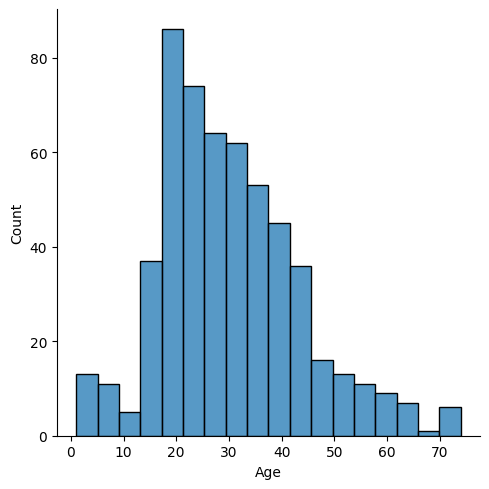

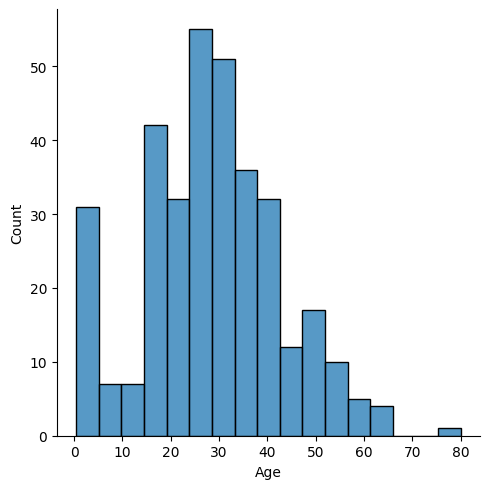

In [26]:
sns.displot(titanic_train['Age'][titanic_train['Survived']==0])
sns.displot(titanic_train['Age'][titanic_train['Survived']==1])

C:\Users\khann\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\khann\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


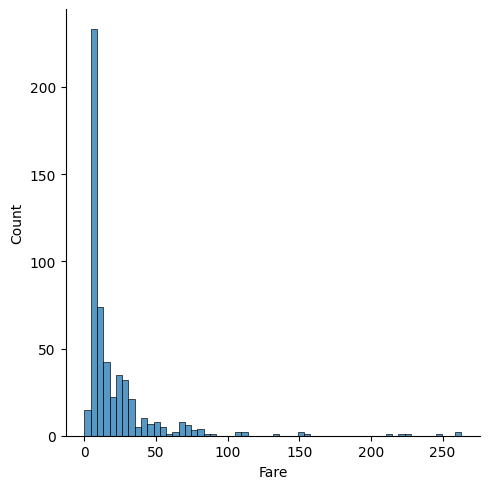

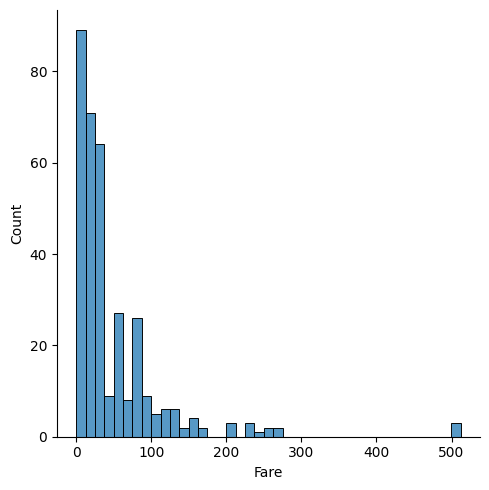

In [27]:
sns.displot(titanic_train['Fare'][titanic_train['Survived']==0])
sns.displot(titanic_train['Fare'][titanic_train['Survived']==1])

C:\Users\khann\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\khann\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


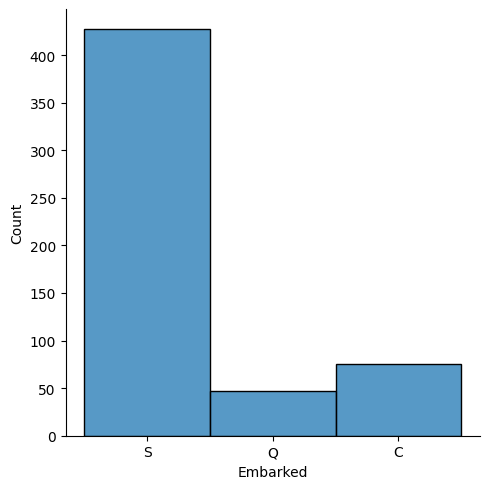

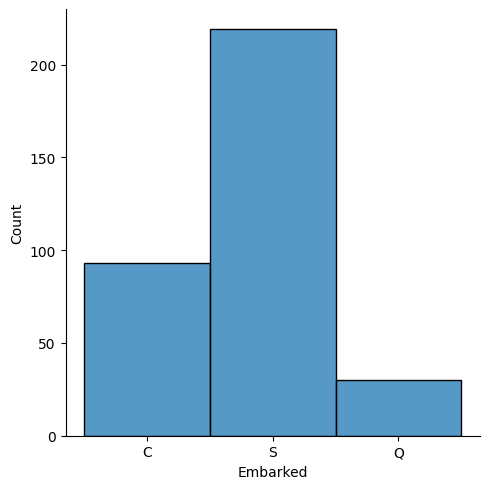

In [28]:
sns.displot(titanic_train['Embarked'][titanic_train['Survived']==0])
sns.displot(titanic_train['Embarked'][titanic_train['Survived']==1])

In [29]:
titanic_train.drop(columns=['Ticket'], inplace = True)
titanic_test.drop(columns=['Ticket'], inplace = True)

In [30]:
titanic_train['family'] = titanic_train['SibSp'] + titanic_train['Parch'] + 1

In [31]:
titanic_train['family'].value_counts()

family
1     537
2     161
3     102
4      29
6      22
5      15
7      12
11      7
8       6
Name: count, dtype: int64

In [32]:
titanic_test['family'] = titanic_test['SibSp'] + titanic_test['Parch'] + 1

In [33]:
def calc(number):
    if number == 1:
        return 'Alone'
    elif number > 1 and number < 5:
        return 'Medium'
    else:
        return 'Large'

In [34]:
titanic_train['family_size'] = titanic_train['family'].apply(calc)

In [35]:
titanic_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,family,family_size
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,2,Medium
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,2,Medium
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,1,Alone
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,2,Medium
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,1,Alone


In [36]:
titanic_test['family_size'] = titanic_test['family'].apply(calc)

In [37]:
titanic_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,family,family_size
0,892,3,"Kelly, Mr. James",male,34.5,0,0,7.8292,Q,1,Alone
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,7.0000,S,2,Medium
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,9.6875,Q,1,Alone
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,8.6625,S,1,Alone
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,12.2875,S,3,Medium


In [38]:
titanic_train.drop(columns=['SibSp', 'Parch', 'family'], inplace=True)

In [39]:
titanic_test.drop(columns=['SibSp', 'Parch', 'family'], inplace=True)

In [40]:
titanic_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Fare,Embarked,family_size
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,7.2500,S,Medium
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,71.2833,C,Medium
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,7.9250,S,Alone
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,53.1000,S,Medium
4,5,0,3,"Allen, Mr. William Henry",male,35.0,8.0500,S,Alone


In [41]:
print(titanic_train.shape)
print(titanic_test.shape)

(891, 9)
(418, 8)


In [42]:
passengerID = titanic_test['PassengerId'].values

In [43]:
titanic_train.drop(columns=['Name', 'PassengerId'], inplace=True)
titanic_test.drop(columns=['Name', 'PassengerId'], inplace=True)

In [44]:
titanic_train.isnull().sum()

Survived       0
Pclass         0
Sex            0
Age            0
Fare           0
Embarked       0
family_size    0
dtype: int64

In [45]:
titanic_train

,Survived,Pclass,Sex,Age,Fare,Embarked,family_size
0,0,3,male,22.0,7.2500,S,Medium
1,1,1,female,38.0,71.2833,C,Medium
2,1,3,female,26.0,7.9250,S,Alone
3,1,1,female,35.0,53.1000,S,Medium
4,0,3,male,35.0,8.0500,S,Alone
...,...,...,...,...,...,...,...
886,0,2,male,27.0,13.0000,S,Alone
887,1,1,female,19.0,30.0000,S,Alone
888,0,3,female,23.0,23.4500,S,Medium
889,1,1,male,26.0,30.0000,C,Alone


In [46]:
titanic_train = pd.get_dummies(titanic_train, columns = ['Pclass','Sex', 'Embarked', 'family_size'], drop_first=True)

In [47]:
titanic_train

,Survived,Age,Fare,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S,family_size_Large,family_size_Medium
0,0,22.0,7.2500,False,True,True,False,True,False,True
1,1,38.0,71.2833,False,False,False,False,False,False,True
2,1,26.0,7.9250,False,True,False,False,True,False,False
3,1,35.0,53.1000,False,False,False,False,True,False,True
4,0,35.0,8.0500,False,True,True,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...
886,0,27.0,13.0000,True,False,True,False,True,False,False
887,1,19.0,30.0000,False,False,False,False,True,False,False
888,0,23.0,23.4500,False,True,False,False,True,False,True
889,1,26.0,30.0000,False,False,True,False,False,False,False


In [48]:
titanic_test = pd.get_dummies(titanic_test, columns = ['Pclass','Sex', 'Embarked', 'family_size'], drop_first=True)

In [49]:
titanic_test

,Age,Fare,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S,family_size_Large,family_size_Medium
0,34.5,7.8292,False,True,True,True,False,False,False
1,47.0,7.0000,False,True,False,False,True,False,True
2,62.0,9.6875,True,False,True,True,False,False,False
3,27.0,8.6625,False,True,True,False,True,False,False
4,22.0,12.2875,False,True,False,False,True,False,True
...,...,...,...,...,...,...,...,...,...
413,42.0,8.0500,False,True,True,False,True,False,False
414,39.0,108.9000,False,False,False,False,False,False,False
415,38.5,7.2500,False,True,True,False,True,False,False
416,38.0,8.0500,False,True,True,False,True,False,False


# Model Building

In [50]:
x=titanic_train.iloc[:,1:].values
y=titanic_train.iloc[:,0].values

In [51]:
x

array([[22.0, 7.25, False, ..., True, False, True],
       [38.0, 71.2833, False, ..., False, False, True],
       [26.0, 7.925, False, ..., True, False, False],
       ...,
       [23.0, 23.45, False, ..., True, False, True],
       [26.0, 30.0, False, ..., False, False, False],
       [32.0, 7.75, False, ..., False, False, False]], dtype=object)

# Decision Tree Algo

In [52]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [53]:
from sklearn.tree import DecisionTreeClassifier

In [54]:
classifier = DecisionTreeClassifier()

In [55]:
classifier.fit(x_train, y_train)

DecisionTreeClassifier()

In [56]:
y_pred = classifier.predict(x_test)

In [57]:
y_pred

array([1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 1], dtype=int64)

# Accuracy Matrix

In [57]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred, y_test)

0.8044692737430168

# Confusion Matrix

In [180]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_pred, y_test)

array([[92, 16],
       [23, 48]], dtype=int64)

# Precision Matrix

In [155]:
from sklearn.metrics import precision_score

In [181]:
precision_score(y_pred, y_test)

0.75

# Recall Matrix

In [177]:
from sklearn.metrics import recall_score

In [182]:
recall_score(y_pred, y_test)

0.676056338028169

# F1 Score

In [183]:
from sklearn.metrics import f1_score

In [184]:
f1_score(y_pred, y_test)

0.7111111111111111

# Classification Report

In [185]:
from sklearn.metrics import classification_report

In [187]:
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.80      0.85      0.83       108
           1       0.75      0.68      0.71        71

    accuracy                           0.78       179
   macro avg       0.78      0.76      0.77       179
weighted avg       0.78      0.78      0.78       179



In [58]:
import pickle
model = open('model.pkl', 'wb')

pickle.dump(classifier, model)

In [60]:
pickled_model = pickle.load(open('model.pkl', 'rb'))
pickled_model.predict(x_test)

array([1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 1], dtype=int64)

In [61]:
x_test

array([[37.0, 52.5542, False, ..., True, False, True],
       [31.0, 50.4958, False, ..., True, False, False],
       [29.0, 24.15, False, ..., False, False, False],
       ...,
       [45.0, 83.475, False, ..., True, False, True],
       [32.0, 7.8958, False, ..., True, False, False],
       [26.0, 7.75, False, ..., False, False, False]], dtype=object)

In [62]:
d = pd.DataFrame(x_test)

In [63]:
d

,0,1,2,3,4,5,6,7,8
0,37.0,52.5542,False,False,True,False,True,False,True
1,31.0,50.4958,False,False,True,False,True,False,False
2,29.0,24.15,False,True,True,True,False,False,False
3,37.0,7.7333,False,True,False,True,False,False,False
4,41.0,50.0,False,False,True,False,True,False,False
...,...,...,...,...,...,...,...,...,...
174,16.0,26.0,True,False,True,False,True,False,False
175,30.5,8.05,False,True,True,False,True,False,False
176,45.0,83.475,False,False,True,False,True,False,True
177,32.0,7.8958,False,True,True,False,True,False,False


In [64]:
data = [[37 , 52 , False , False , True, False , True , False , True]]

In [65]:
pickled_model.predict(data)

array([0], dtype=int64)

In [66]:
data = [[41 , 50, False , False , True, False , True , False , False]]
pickled_model.predict(data)

array([0], dtype=int64)

In [70]:
pickled_model.predict([[38, 71.2833, False, False, False, False, False, False, True]])

array([1], dtype=int64)